In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Data Source: https://www.openml.org/d/40536
data = pd.read_csv('speeddating.csv')
data = data[data.gender == 'male'] #filter for only male entries
data['match'].value_counts()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0    3504
1     690
Name: match, dtype: int64

In [3]:
# Create subset of the data, to train on. We want to predict if a match will happen based on various interests
new_columns = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', \
             'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'match']
df = data[new_columns]
df.head()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,match
100,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,0
101,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,0
102,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,0
103,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,0
104,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,0


In [4]:
 # Here we can see that the only non-numerical value across all columns, is this string: "?"
df.apply(pd.value_counts) 

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,match
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3504.0
1,NaN,22.0,NaN,NaN,NaN,NaN,NaN,66.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,690.0
2,NaN,44.0,22.0,NaN,NaN,22.0,66.0,22.0,NaN,32.0,22.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN
3,10.0,22.0,10.0,NaN,22.0,44.0,22.0,22.0,NaN,NaN,44.0,44.0,NaN,22.0,NaN,NaN,54.0,NaN
4,NaN,10.0,22.0,NaN,22.0,22.0,22.0,NaN,22.0,NaN,66.0,22.0,22.0,22.0,NaN,22.0,NaN,NaN
5,22.0,44.0,44.0,22.0,22.0,NaN,32.0,44.0,NaN,NaN,NaN,22.0,NaN,22.0,22.0,NaN,22.0,NaN
6,22.0,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,66.0,NaN,22.0,44.0,22.0,NaN
7,NaN,NaN,22.0,22.0,76.0,22.0,44.0,NaN,22.0,44.0,22.0,54.0,22.0,44.0,22.0,44.0,NaN,NaN
8,44.0,22.0,22.0,NaN,22.0,54.0,NaN,22.0,66.0,44.0,NaN,22.0,54.0,10.0,NaN,22.0,NaN,NaN
9,22.0,NaN,22.0,44.0,NaN,NaN,NaN,NaN,32.0,44.0,NaN,22.0,22.0,22.0,54.0,NaN,NaN,NaN


In [5]:
# Clean the data by removing all rows containing "?" value
for index, row in df.iterrows():
    if row['sports'] == "?": #the "?" values are uniform across all columns, so the attribute is arbitrary
        df.drop(index, inplace=True)
# And convert all columns to integers
for column in df.columns:
    df[column] = pd.to_numeric(df[column])

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
# Confirm all values are OK. We can leave the 13 and 14 entries for now...
df.apply(pd.value_counts)

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,match
0,NaN,NaN,NaN,NaN,18.0,18.0,18.0,NaN,18.0,NaN,NaN,18.0,18.0,18.0,NaN,NaN,36.0,3489.0
1,83.0,656.0,83.0,29.0,48.0,82.0,244.0,670.0,400.0,10.0,527.0,100.0,NaN,40.0,37.0,373.0,1061.0,685.0
2,159.0,528.0,330.0,16.0,52.0,128.0,308.0,530.0,199.0,91.0,443.0,114.0,44.0,176.0,40.0,762.0,754.0,NaN
3,258.0,389.0,349.0,94.0,274.0,423.0,542.0,577.0,407.0,148.0,380.0,285.0,75.0,262.0,25.0,398.0,534.0,NaN
4,233.0,350.0,366.0,107.0,381.0,421.0,401.0,354.0,378.0,104.0,367.0,362.0,115.0,286.0,92.0,395.0,245.0,NaN
5,331.0,411.0,550.0,406.0,486.0,556.0,557.0,590.0,441.0,350.0,634.0,729.0,172.0,457.0,357.0,588.0,460.0,NaN
6,372.0,312.0,527.0,477.0,510.0,443.0,466.0,491.0,538.0,429.0,693.0,651.0,481.0,640.0,461.0,499.0,384.0,NaN
7,704.0,516.0,607.0,865.0,926.0,634.0,512.0,465.0,494.0,706.0,452.0,836.0,820.0,745.0,691.0,454.0,305.0,NaN
8,605.0,399.0,699.0,899.0,700.0,790.0,549.0,225.0,822.0,852.0,414.0,557.0,955.0,693.0,861.0,371.0,168.0,NaN
9,709.0,338.0,413.0,729.0,527.0,334.0,316.0,172.0,419.0,954.0,121.0,338.0,931.0,435.0,737.0,166.0,76.0,NaN


In [7]:
df.dtypes

sports      int64
tvsports    int64
exercise    int64
dining      int64
museums     int64
art         int64
hiking      int64
gaming      int64
clubbing    int64
reading     int64
tv          int64
theater     int64
movies      int64
concerts    int64
music       int64
shopping    int64
yoga        int64
match       int64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split

# Split data into 90% training samples and 10% testing samples
X_cols = list(df.columns)
X_cols.remove('match')
X_train, X_test, Y_train, Y_test  = train_test_split(df[X_cols], df.match, test_size = 0.1)

In [9]:
from sklearn import linear_model
from sklearn import metrics

# *** 1. Lets try a logistic regression first, since we have a binary variable (Match) to predict
log_model = linear_model.LogisticRegression()
log_model.fit(X_train, Y_train)

y_pred = log_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred)) 
metrics.confusion_matrix(Y_test, y_pred)

Accuracy: 0.8253588516746412


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[345,   0],
       [ 73,   0]])

In [10]:
## Our accuracy is roughly the same as sum of "No" matches / Total matches
print(df.match.value_counts() [0] / df.shape[0])
## ... and our model fails to ever predict "Yes"
print(metrics.confusion_matrix(Y_test, y_pred)[0][1], metrics.confusion_matrix(Y_test, y_pred)[1][1])

0.8358888356492573
0 0


In [11]:
from sklearn.metrics import r2_score

# *** 2. Let's try to examine this further with a linear regression, since our X values are all ordinal
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

# Determine how this model is performing
print("Model performance on training set: {}".format(model.score(X_train, Y_train)))
print("Model performance on testing set: {}".format(model.score(X_test, Y_test)))
Y_pred = model.predict(X_train)
print("R^2 Score on training set:", r2_score(Y_pred, Y_train))
Y_test_pred = model.predict(X_test)
print("R^2 Score on testing set:", r2_score(Y_test_pred, Y_test))

Model performance on training set: 0.013670705616044998
Model performance on testing set: 0.0024863429495092237
R^2 Score on training set: -71.14911373896562
R^2 Score on testing set: -82.27622275416975


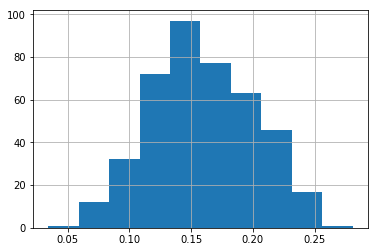

In [12]:
# The performance metrics here are predictably awful. But we can still take a closer look
%matplotlib inline

# Plot distribution of Match predictions (0-1) by our Linear Regression model, for test sample
pd.DataFrame([Y_test_pred, Y_test]).T.sort_values(by=0)[0].hist()

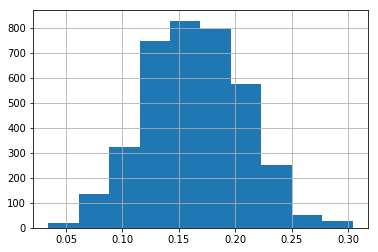

In [13]:
#... and also the training set. Turns out they both have normal distributions.
pd.DataFrame([Y_pred, Y_train]).T.sort_values(by=0)[0].hist()

In [14]:
prediction_scores = pd.DataFrame([Y_pred, Y_train]).T.sort_values(by=0)
prediction_scores.head(25) #get bottom 25

,0,1
2029,0.034372,0.0
2794,0.034372,0.0
573,0.034372,0.0
578,0.034372,1.0
1269,0.034372,0.0
1438,0.034372,0.0
3260,0.034372,0.0
3743,0.034372,1.0
3460,0.034372,0.0
2395,0.034372,0.0


In [15]:
prediction_scores.tail(25) #get top 25

,0,1
2186,0.280789,0.0
2699,0.280789,0.0
1696,0.280789,0.0
424,0.280789,0.0
70,0.280789,0.0
501,0.280789,1.0
487,0.280789,0.0
3657,0.280789,0.0
2490,0.280789,1.0
1189,0.280789,0.0


In [16]:
losers = prediction_scores.tail(20).index
winners = prediction_scores.head(20).index

df.iloc[winners]

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,match
4250,9,2,5,7,7,9,8,1,5,9,5,5,9,8,9,8,5,0
5681,9,8,5,8,4,4,2,2,7,5,6,5,6,3,6,7,3,0
1401,6,8,8,3,3,3,6,1,5,8,3,2,7,3,7,3,5,1
1406,8,8,8,7,3,3,5,1,7,7,3,7,8,6,8,2,7,0
2568,7,7,8,3,2,2,6,5,9,8,2,4,7,9,10,3,1,0
3137,9,9,5,10,9,10,10,6,8,10,2,5,5,5,9,5,5,0
6677,6,1,6,7,7,8,7,14,9,9,8,9,10,10,10,7,2,0
7947,7,3,5,7,5,5,7,2,5,3,1,5,7,6,7,2,2,0
7138,10,1,10,10,10,10,5,1,1,10,5,10,10,10,10,10,5,0
4812,8,7,5,7,5,4,8,7,1,5,7,2,2,10,9,2,3,0


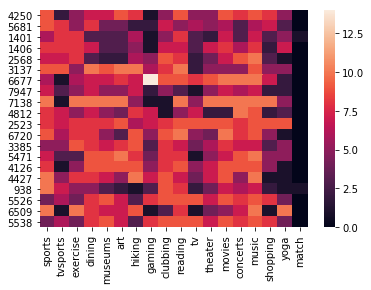

In [17]:
# Same data as above, but in a heatmap
sns.heatmap(df.iloc[winners])

In [18]:
df.iloc[losers]

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,match
1005,8,2,8,7,7,7,7,5,9,8,8,5,7,6,8,5,5,0
991,8,3,5,9,10,10,9,6,8,10,2,9,10,8,8,3,5,0
7377,2,4,4,8,8,8,7,5,2,6,5,7,8,9,9,7,7,0
4997,4,2,7,6,8,8,8,6,6,8,4,10,10,7,7,5,10,1
2388,7,8,7,8,4,5,5,6,8,7,4,6,8,8,7,6,3,1
6716,9,6,8,8,5,3,9,5,9,10,5,4,10,8,9,5,1,1
3037,8,6,9,9,6,4,2,7,6,9,5,2,9,2,7,9,2,0
6705,8,8,9,2,6,8,6,2,5,2,7,1,10,3,5,5,6,0
3492,7,2,7,9,5,8,5,7,3,9,5,5,9,8,8,6,2,0
6397,10,5,9,5,0,0,5,5,0,8,7,0,0,0,1,2,0,1


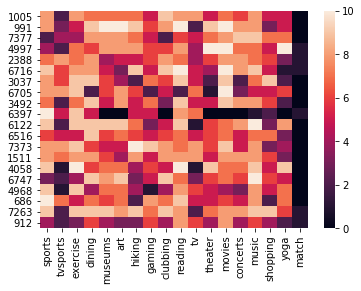

In [19]:
sns.heatmap(df.iloc[losers])

In [20]:
# Take a look at the calculated coeffcients for each attribute
pd.DataFrame([model.coef_, X_cols]).T

,0,1
0,0.00150593,sports
1,-0.000100396,tvsports
2,0.00269419,exercise
3,0.0103903,dining
4,-0.0167277,museums
5,0.0115545,art
6,0.00195752,hiking
7,-0.00113312,gaming
8,0.00744252,clubbing
9,0.00597445,reading


In [21]:
# What if we sort our X values into "Extrovert" and "Introvert" subsets? NOTE: This is subjective
extro_columns = ['sports', 'exercise', 'hiking', 'clubbing', 'concerts', 'shopping', 'yoga']
intro_columns = ['tvsports', 'gaming', 'reading', 'tv', 'movies', 'music', 'art']

extro_X_train = X_train[extro_columns]
extro_X_test = X_test[extro_columns]

intro_X_train = X_train[intro_columns]
intro_X_test = X_test[intro_columns]

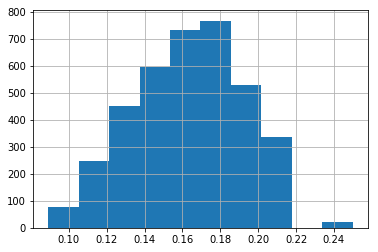

In [22]:
## 3. Now lets try Linear Regression again, but just for extrovert attributes
model = linear_model.LinearRegression()
model.fit(extro_X_train, Y_train)

Y_pred = model.predict(extro_X_train)
Y_test_pred = model.predict(extro_X_test)
pd.DataFrame([Y_pred, Y_train]).T.sort_values(by=0)[0].hist()

In [23]:
pd.DataFrame([model.coef_, extro_columns]).T.sort_values(by=0) # Note: Shopping is always negative

,0,1
4,-0.00206306,concerts
5,-0.00179906,shopping
2,0.00134629,hiking
0,0.00293714,sports
1,0.00337859,exercise
6,0.0054521,yoga
3,0.00724802,clubbing


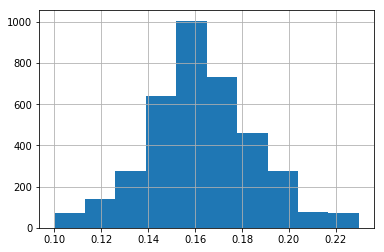

In [24]:
## 4. And now for introverts...
model = linear_model.LinearRegression()
model.fit(intro_X_train, Y_train)

Y_pred = model.predict(intro_X_train)
Y_test_pred = model.predict(intro_X_test)
pd.DataFrame([Y_pred, Y_train]).T.sort_values(by=0)[0].hist()

In [25]:
pd.DataFrame([model.coef_, intro_columns]).T.sort_values(by=0) # Music is usually very high here

,0,1
4,-0.00683165,movies
3,-0.00597614,tv
6,0.000570965,art
2,0.00201465,reading
0,0.00219067,tvsports
1,0.00222372,gaming
5,0.00659952,music
